In [1]:
# import pandas, random and numpy
import pandas as pd
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Make random data
def random_data(n):
    data = []
    cols = ['TB','BB','LB','LP','Status']
    for i in range(n):
        a = randint(158,210)
        b = randint(50,100)
        c = randint(12,20)
        d = randint(60,120)
        y = weight(a,b)
        data.append([a,b,c,d,y])
    df = pd.DataFrame(data,columns=cols)
    return df

        
def weight(a,b):
    tinggi = a/100
    count = b/tinggi**2
    if(count<18):
        return 'kurang'
    elif(count>=18 and count<25):
        return 'normal'
    elif(count>=25):
        return 'obesitas'

In [3]:
# call function
data = random_data(500)

In [4]:
print(data['Status'].unique())

['obesitas' 'normal' 'kurang']


In [5]:
print(data.describe())

               TB          BB          LB          LP
count  500.000000  500.000000  500.000000  500.000000
mean   184.944000   74.624000   16.112000   90.418000
std     15.894216   15.039648    2.544091   17.368552
min    158.000000   50.000000   12.000000   60.000000
25%    170.000000   62.000000   14.000000   75.000000
50%    185.000000   73.000000   16.000000   92.000000
75%    199.000000   88.250000   18.000000  105.000000
max    210.000000  100.000000   20.000000  120.000000


In [6]:
print(data['Status'].value_counts())

normal      223
obesitas    144
kurang      133
Name: Status, dtype: int64


In [7]:
data

,TB,BB,LB,LP,Status
0,182,88,13,83,obesitas
1,190,90,12,108,normal
2,161,62,12,81,normal
3,205,81,13,93,normal
4,194,50,20,99,kurang
5,203,56,19,72,kurang
6,180,95,18,85,obesitas
7,166,75,19,62,obesitas
8,158,71,12,61,obesitas
9,183,89,15,108,obesitas


In [8]:
df = data[['TB','BB','LB','LP']].to_numpy()
label = data['Status']

In [9]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df, label, test_size=0.10, random_state=12)

In [10]:
print ("data train_x => ", train_x)
print ("data train_y => ", train_y)
print ("data test_x => ", test_x)
print ("data testy_ => ",test_y)

data train_x =>  [[174  71  17  69]
 [197  86  14 113]
 [183 100  14  77]
 ...
 [177  87  13 119]
 [163  85  16  84]
 [183  64  15 109]]
data train_y =>  340      normal
455      normal
349    obesitas
285      kurang
398      kurang
67     obesitas
492      kurang
35       kurang
177    obesitas
86     obesitas
448    obesitas
416      kurang
411      normal
151      kurang
287      normal
472      kurang
301      normal
21       normal
195      kurang
188      kurang
37       normal
452      normal
462    obesitas
279      kurang
262      normal
128    obesitas
16       kurang
272      normal
200    obesitas
29       normal
         ...   
100      normal
446      normal
291      normal
89       normal
82     obesitas
269      normal
204      normal
104      normal
373      kurang
384      normal
74     obesitas
118    obesitas
459      normal
418      kurang
473      normal
141      kurang
389      kurang
436      kurang
49       kurang
278    obesitas
432      kurang
332      kuran

Clasifikasi KNN 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_x,train_y)
pred_y = clf.predict(test_x)

In [12]:
# menampilkan hasil tebakan berdasarkan data test
from sklearn.metrics import accuracy_score
for i in range (len(test_x)):
    print (test_x[i], " ditebak => ",clf.predict(test_x)[i])

[167  79  12  73]  ditebak =>  obesitas
[204  70  19  94]  ditebak =>  kurang
[195  97  17  85]  ditebak =>  obesitas
[199  68  14  91]  ditebak =>  kurang
[197  94  14  72]  ditebak =>  normal
[184  69  17  75]  ditebak =>  normal
[163  59  20 110]  ditebak =>  normal
[192  80  17  83]  ditebak =>  normal
[180  95  18  85]  ditebak =>  obesitas
[191  97  16  72]  ditebak =>  normal
[166 100  12  82]  ditebak =>  obesitas
[201  91  15  97]  ditebak =>  normal
[181  80  19  89]  ditebak =>  normal
[194  82  18 100]  ditebak =>  normal
[188  73  15  93]  ditebak =>  normal
[206  87  14  86]  ditebak =>  normal
[193  79  20 112]  ditebak =>  normal
[161  81  15 115]  ditebak =>  obesitas
[195  71  12 113]  ditebak =>  normal
[161  95  14 116]  ditebak =>  obesitas
[161  51  14 107]  ditebak =>  normal
[182  78  13  70]  ditebak =>  normal
[181  55  15  77]  ditebak =>  kurang
[206  96  15  62]  ditebak =>  normal
[194  64  13  61]  ditebak =>  kurang
[192  60  17 117]  ditebak =>  kurang


In [13]:
score = accuracy_score(test_y,pred_y)
print(score)

0.9


In [14]:
akurasiTrain=clf.score(train_x,train_y)

In [19]:
akurasiTest=clf.score(test_x,test_y)

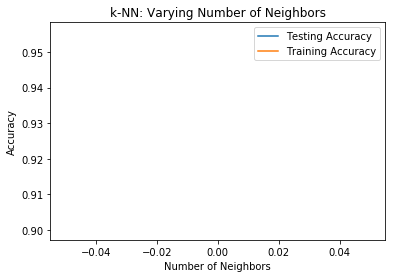

In [20]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(akurasiTest, label = 'Testing Accuracy')
plt.plot(akurasiTrain, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()